# EXPLORATORY DATA ANALYSIS ON A DATASET

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


1.	Data Cleaning and Preparation

●	Load the dataset into a DataFrame or equivalent data structure.

In [4]:
data = pd.read_csv('/content/Cardiotocographic.csv')

In [5]:
data.head()                   #show the top  5

LB        AC   FM        UC        DL   DS   DP  ASTV  MSTV  ALTV  \
0  120.000000  0.000000  0.0  0.000000  0.000000  0.0  0.0  73.0   0.5  43.0   
1  132.000000  0.006380  0.0  0.006380  0.003190  0.0  0.0  17.0   2.1   0.0   
2  133.000000  0.003322  0.0  0.008306  0.003322  0.0  0.0  16.0   2.1   0.0   
3  134.000000  0.002561  0.0  0.007742  0.002561  0.0  0.0  16.0   2.4   0.0   
4  131.948232  0.006515  0.0  0.008143  0.000000  0.0  0.0  16.0   2.4   0.0   

   MLTV  Width  Tendency  NSP  
0   2.4   64.0  0.999926  2.0  
1  10.4  130.0  0.000000  1.0  
2  13.4  130.0  0.000000  1.0  
3  23.0  117.0  1.000000  1.0  
4  19.9  117.0  1.000000  1.0

In [6]:

data.shape   #we have 2126record   and 14 columes

(2126, 14)

In [7]:
data.describe()

LB           AC           FM           UC           DL  \
count  2105.000000  2106.000000  2126.000000  2126.000000  2126.000000   
mean    133.343598     0.003219     0.009894     0.004391     0.001895   
std      11.270154     0.004391     0.067540     0.003340     0.003343   
min      51.842487    -0.019284    -0.480634    -0.014925    -0.015393   
25%     126.000000     0.000000     0.000000     0.001851     0.000000   
50%     133.000000     0.001634     0.000000     0.004484     0.000000   
75%     140.000000     0.005650     0.002567     0.006536     0.003289   
max     214.000000     0.038567     0.961268     0.030002     0.030769   

                DS           DP         ASTV         MSTV         ALTV  \
count  2105.000000  2105.000000  2126.000000  2126.000000  2126.000000   
mean      0.000003     0.000175    46.995984     1.364378    10.285964   
std       0.000142     0.000840    18.813973     1.173632    21.205041   
min      -0.001353    -0.005348   -63.000000    -6.600000   -91.000000   
25%       0.000000     0.000000    32.000000     0.700000     0.000000   
50%       0.000000     0.000000    49.000000     1.200000     0.000000   
75%       0.000000     0.000000    61.000000     1.700000    11.000000   
max       0.002706     0.010695   162.000000    13.800000   182.000000   

              MLTV        Width     Tendency          NSP  
count  2105.000000  2105.000000  2105.000000  2105.000000  
mean      8.284887    70.429260     0.316371     1.304507  
std       7.772858    42.931822     0.645622     0.644619  
min     -50.700000  -174.000000    -3.000000    -1.025988  
25%       4.600000    37.000000     0.000000     1.000000  
50%       7.400000    67.000000     0.000000     1.000000  
75%      10.900000   100.000000     1.000000     1.000000  
max     101.400000   357.000000     3.000000     5.000000

●	Identify and correct any inconsistencies in data types (e.g., numerical values stored as strings).

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2105 non-null   float64
 1   AC        2106 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-null   float64
 4   DL        2126 non-null   float64
 5   DS        2105 non-null   float64
 6   DP        2105 non-null   float64
 7   ASTV      2126 non-null   float64
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   float64
 10  MLTV      2105 non-null   float64
 11  Width     2105 non-null   float64
 12  Tendency  2105 non-null   float64
 13  NSP       2105 non-null   float64
dtypes: float64(14)
memory usage: 232.7 KB


In [9]:
data.duplicated().sum()

2

In [10]:
data[data.duplicated()]

LB        AC   FM        UC   DL   DS   DP  ASTV  MSTV  ALTV  MLTV  \
1115  122.0  0.000000  0.0  0.000000  0.0  0.0  0.0  19.0   1.9   0.0  15.1   
1458  148.0  0.004717  0.0  0.002358  0.0  0.0  0.0  40.0   0.9   0.0  10.6   

      Width  Tendency  NSP  
1115   39.0       0.0  1.0  
1458   35.0       0.0  1.0

In [11]:
data =data.drop_duplicates()    #we drop duplicates

In [12]:
data.duplicated().sum()

0

In [13]:
data =data.reset_index()            #set index

●	Handle missing values appropriately (e.g., imputation, deletion).

In [14]:
data.isnull().sum().sum()

167

In [15]:
data['LB']=data['LB'].fillna(data['LB'].mean())   #1
data['AC']=data['AC'].fillna(data['AC'].mean())   #2
data['FM']=data['FM'].fillna(data['FM'].mean())    #3
data['UC']=data['UC'].fillna(data['UC'].mean())    #4
data['DL']=data['DL'].fillna(data['DL'].mean())    #5
data['DP']=data['DP'].fillna(data['DP'].mean())     #6
data['ASTV']=data['ASTV'].fillna(data['ASTV'].mean())   #7
data['MSTV']=data['MSTV'].fillna(data['MSTV'].mean())    #8
data['ALTV']=data['ALTV'].fillna(data['ALTV'].mean())    #9
data['MLTV']=data['MLTV'].fillna(data['MLTV'].mean())     #10
data['Width']=data['Width'].fillna(data['Width'].mean())   #11
data['Tendency']=data['Tendency'].fillna(data['Tendency'].mean())   #12
data['NSP']=data['NSP'].fillna(data['NSP'].mean())   #13
data['DS']=data['DS'].fillna(data['DS'].mean())   #14

In [16]:
data.isnull().sum().sum()               #removed null value

0

In [17]:
data

index          LB        AC        FM        UC        DL   DS   DP  \
0         0  120.000000  0.000000  0.000000  0.000000  0.000000  0.0  0.0   
1         1  132.000000  0.006380  0.000000  0.006380  0.003190  0.0  0.0   
2         2  133.000000  0.003322  0.000000  0.008306  0.003322  0.0  0.0   
3         3  134.000000  0.002561  0.000000  0.007742  0.002561  0.0  0.0   
4         4  131.948232  0.006515  0.000000  0.008143  0.000000  0.0  0.0   
...     ...         ...       ...       ...       ...       ...  ...  ...   
2119   2121  140.000000  0.000000  0.961268  0.007426  0.000000  0.0  0.0   
2120   2122  140.000000  0.000775  0.000000  0.006979  0.000000  0.0  0.0   
2121   2123  140.000000  0.000980  0.000000  0.006863  0.000000  0.0  0.0   
2122   2124  140.000000  0.000679  0.000000  0.006110  0.000000  0.0  0.0   
2123   2125  142.000000  0.001616 -0.000188  0.008078  0.000000  0.0  0.0   

      ASTV  MSTV       ALTV  MLTV  Width  Tendency       NSP  
0     73.0   0.5  43.000000   2.4   64.0  0.999926  2.000000  
1     17.0   2.1   0.000000  10.4  130.0  0.000000  1.000000  
2     16.0   2.1   0.000000  13.4  130.0  0.000000  1.000000  
3     16.0   2.4   0.000000  23.0  117.0  1.000000  1.000000  
4     16.0   2.4   0.000000  19.9  117.0  1.000000  1.000000  
...    ...   ...        ...   ...    ...       ...       ...  
2119  79.0   0.2  25.000000   7.2   40.0  0.000000  2.000000  
2120  78.0   0.4  22.000000   7.1   66.0  1.000000  2.000000  
2121  79.0   0.4  20.000000   6.1   67.0  1.000000  1.990464  
2122  78.0   0.4  27.000000   7.0   66.0  1.000000  2.000000  
2123  74.0   0.4  35.857183   5.0   42.0  0.000000  1.000000  

[2124 rows x 15 columns]

# Detect and treat outliers if necessary.

<Axes: ylabel='LB'>

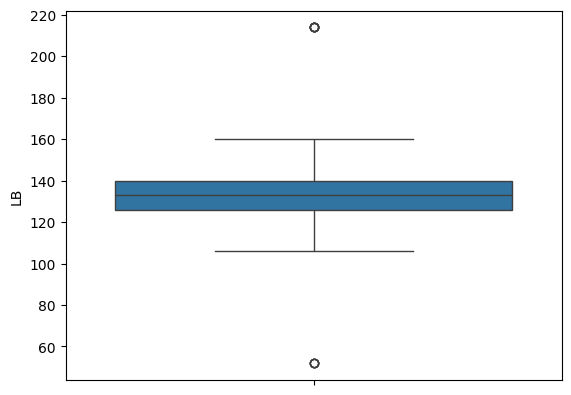

In [18]:
sns.boxplot(data['LB'])        # we have 2outliers

In [19]:
data.loc[data['LB']>data['LB'].quantile(0.99),'LB']=data['LB'].quantile(0.99)   #handleing the outler and outler are remove
data.loc[data['LB']<data['LB'].quantile(0.01),'LB']=data['LB'].quantile(0.01)

<Axes: ylabel='LB'>

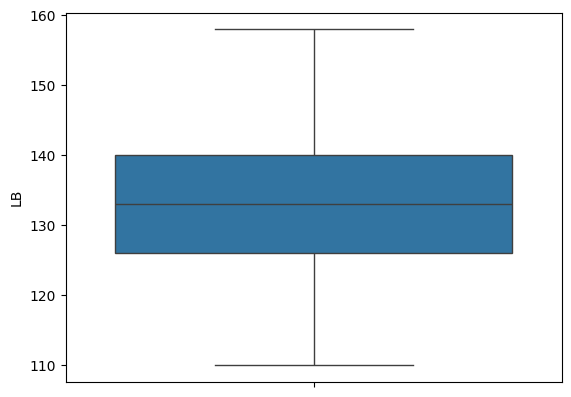

In [20]:
sns.boxplot(data['LB'])            #we  treat outliers

<Axes: ylabel='AC'>

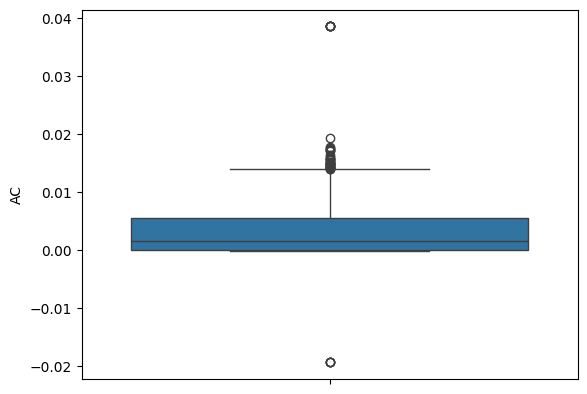

In [21]:
sns.boxplot(data['AC'])    #we  Detect ouliers with  boxplot

In [22]:
data.loc[data['AC']>data['AC'].quantile(0.99),'AC']=data['AC'].quantile(0.99)


In [23]:
data.loc[data['AC']<data['AC'].quantile(0.01),'AC']=data['AC'].quantile(0.01)

<Axes: ylabel='AC'>

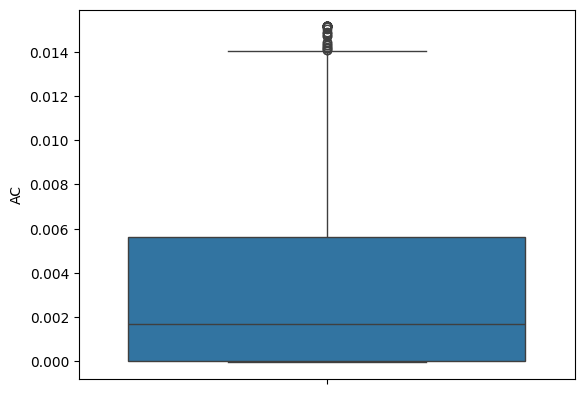

In [24]:
sns.boxplot(data['AC'])          #we  treat  ouliers

<Axes: ylabel='FM'>

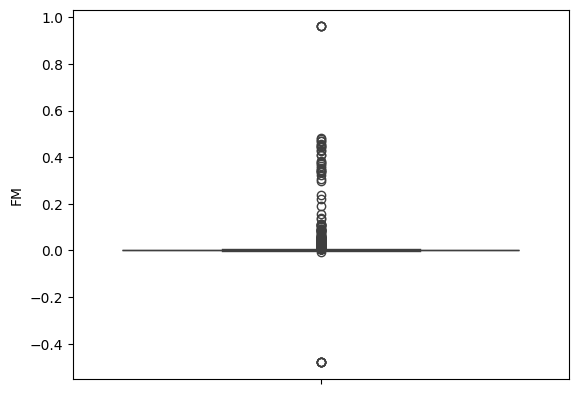

In [25]:
sns.boxplot(data['FM'])             #we detect    outliers

In [26]:
data.loc[data['FM']>data['FM'].quantile(0.99),'FM'] = data['FM'].quantile(0.99)


In [27]:
data.loc[data['FM']<data['FM'].quantile(0.01),'FM'] = data['FM'].quantile(0.01)

<Axes: >

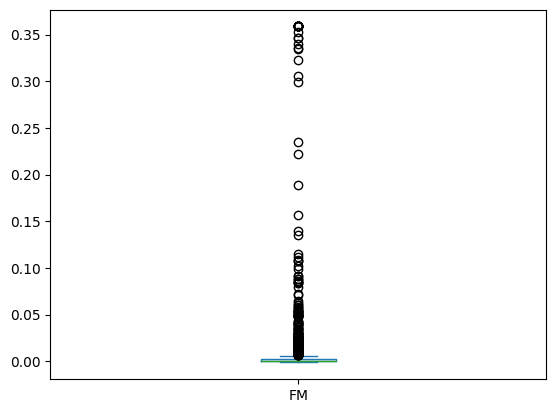

In [28]:
data.FM.plot(kind='box')           #we treat outliers

<Axes: ylabel='UC'>

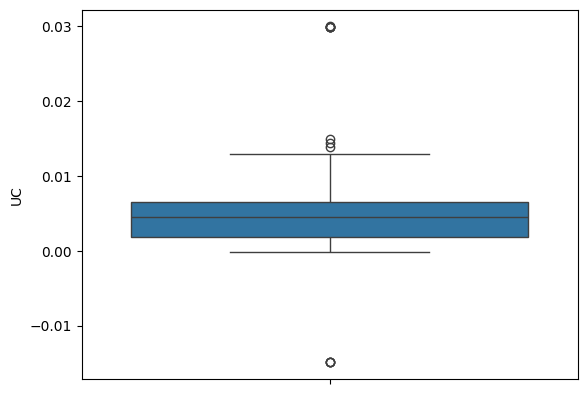

In [29]:
sns.boxplot(data['UC'])                 # we detect outliers

In [30]:
data.loc[data['UC']>data['UC'].quantile(0.99),'UC'] = data['UC'].quantile(0.99)
data.loc[data['UC']<data['UC'].quantile(0.01),'UC'] = data['UC'].quantile(0.01)

<Axes: >

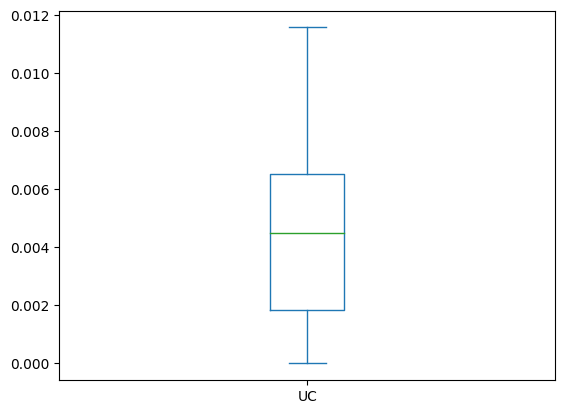

In [31]:
data.UC.plot(kind='box')                #we treat outliers

<Axes: >

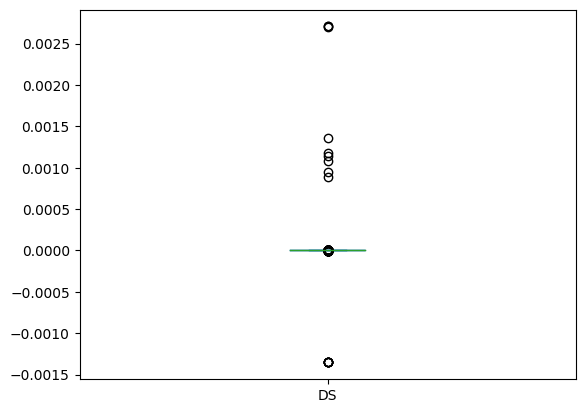

In [32]:
data.DS.plot(kind='box')             # we detect outliers

In [33]:
data.loc[data['DS']>data['DS'].quantile(0.99),'DS'] = data['DS'].quantile(0.99)
data.loc[data['DS']<data['DS'].quantile(0.01),'DS'] = data['DS'].quantile(0.01)

<Axes: >

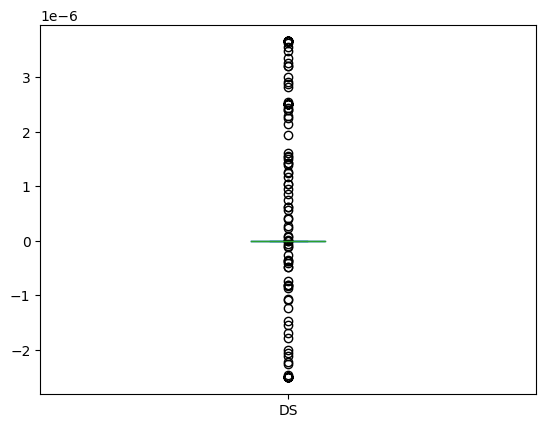

In [34]:
data.DS.plot(kind='box')              #we  treat  outliers

<Axes: >

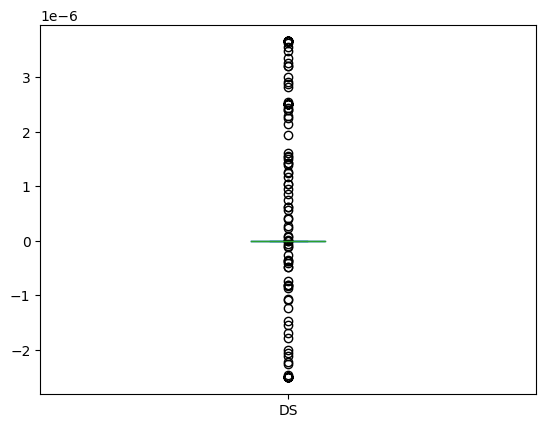

In [35]:
data.DS.plot(kind='box')          #we detect outliers

In [36]:
data.loc[data['DS']>data['DS'].quantile(0.99),'DS'] = data['DS'].quantile(0.99)
data.loc[data['DS']<data['DS'].quantile(0.01),'DS'] = data['DS'].quantile(0.01)

<Axes: >

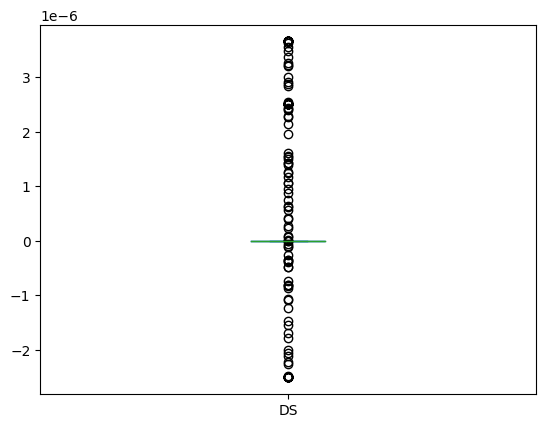

In [37]:
data.DS.plot(kind='box')           #we treat  outliers

<Axes: >

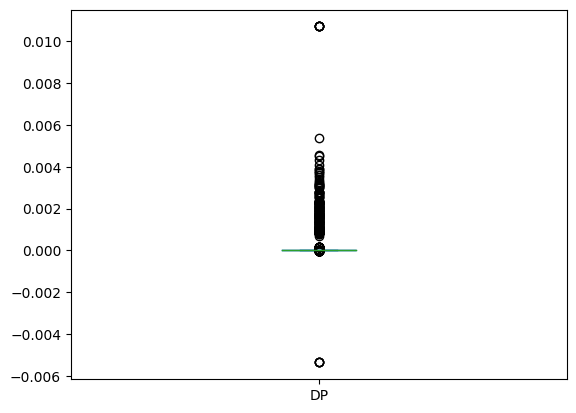

In [38]:
data.DP.plot(kind='box')               #we detect outliers

In [39]:
data.loc[data['DP']>data['DP'].quantile(0.99),'DP'] = data['DP'].quantile(0.99)
data.loc[data['DP']<data['DP'].quantile(0.01),'DP'] = data['DP'].quantile(0.01)

<Axes: >

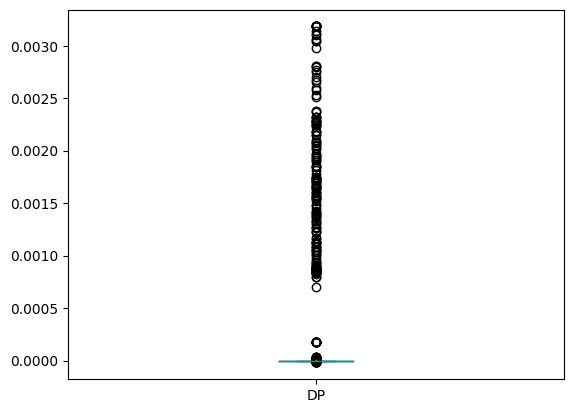

In [40]:
data.DP.plot(kind='box')               #we treat outliers

<Axes: >

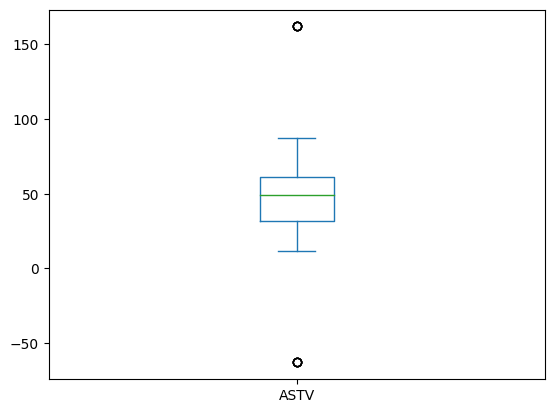

In [41]:
data.ASTV.plot(kind='box')                      #we detect outliers

In [42]:
data.loc[data['ASTV']>data['ASTV'].quantile(0.99),'ASTV'] = data['ASTV'].quantile(0.99)
data.loc[data['ASTV']<data['ASTV'].quantile(0.01),'ASTV'] = data['ASTV'].quantile(0.01)

<Axes: >

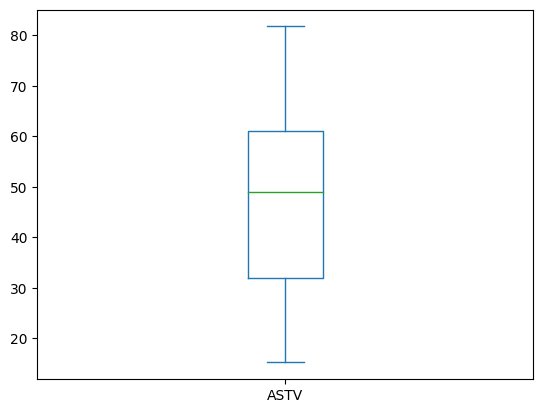

In [43]:
data.ASTV.plot(kind='box')                     #we treat outliers

<Axes: >

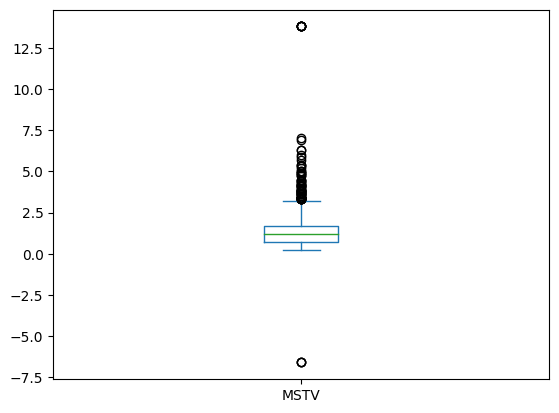

In [44]:
data.MSTV.plot(kind='box')                    #we detect outliers

In [45]:
data.loc[data['MSTV']>data['MSTV'].quantile(0.99),'MSTV'] = data['MSTV'].quantile(0.99)
data.loc[data['MSTV']<data['MSTV'].quantile(0.01),'MSTV'] = data['MSTV'].quantile(0.01)

<Axes: >

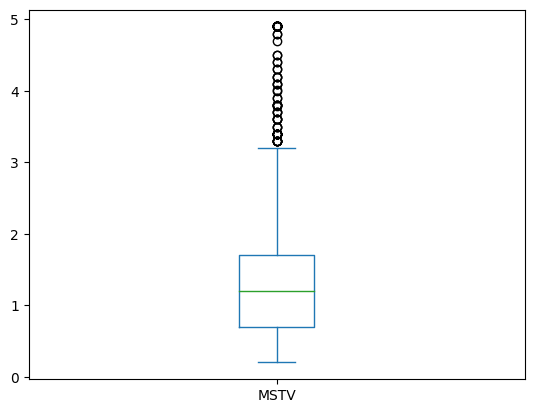

In [46]:
data.MSTV.plot(kind='box')                     #we treat outliers

<Axes: >

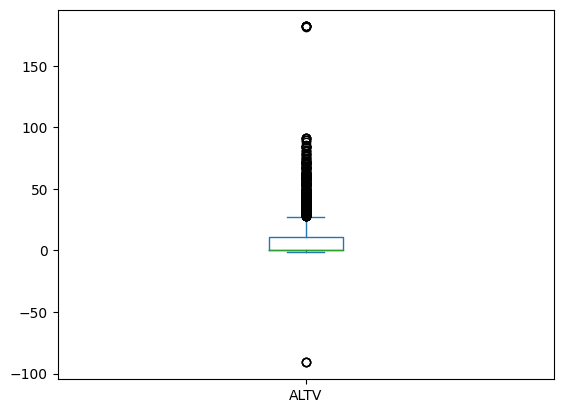

In [47]:
data.ALTV.plot(kind='box')                     #we detect outliers

In [48]:
data.loc[data['ALTV']>data['ALTV'].quantile(0.99),'ALTV'] = data['ALTV'].quantile(0.99)
data.loc[data['ALTV']<data['ALTV'].quantile(0.01),'ALTV'] = data['ALTV'].quantile(0.01)

<Axes: >

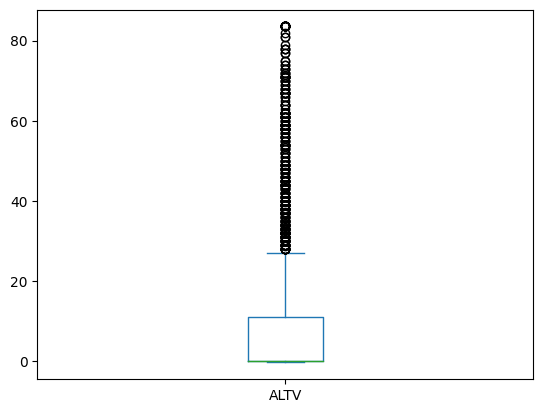

In [49]:
data.ALTV.plot(kind='box')                     #we treat outliers

<Axes: >

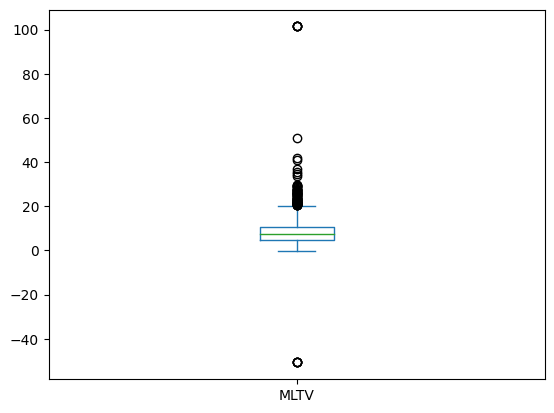

In [50]:
data.MLTV.plot(kind='box')                #we detect outliers

In [51]:
data.loc[data['MLTV']>data['MLTV'].quantile(0.99),'MLTV'] = data['MLTV'].quantile(0.99)
data.loc[data['MLTV']<data['MLTV'].quantile(0.01),'MLTV'] = data['MLTV'].quantile(0.01)

<Axes: >

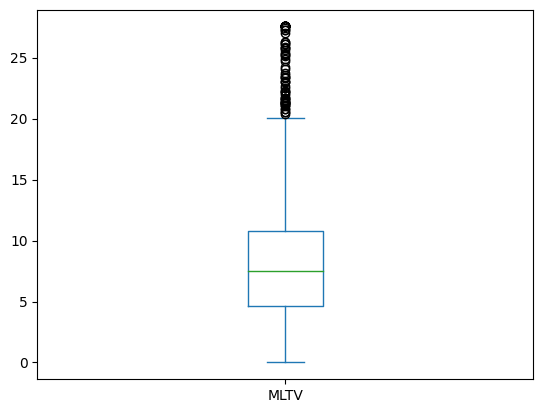

In [52]:
data.MLTV.plot(kind='box')                   #we treat outliers

<Axes: >

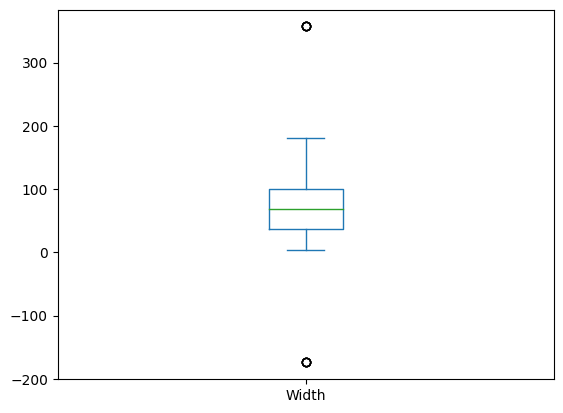

In [53]:
data.Width.plot(kind='box')                   #we detect outliers

In [54]:
data.loc[data['Width']>data['Width'].quantile(0.99),'Width'] = data['Width'].quantile(0.99)
data.loc[data['Width']<data['Width'].quantile(0.01),'Width'] = data['Width'].quantile(0.01)

<Axes: >

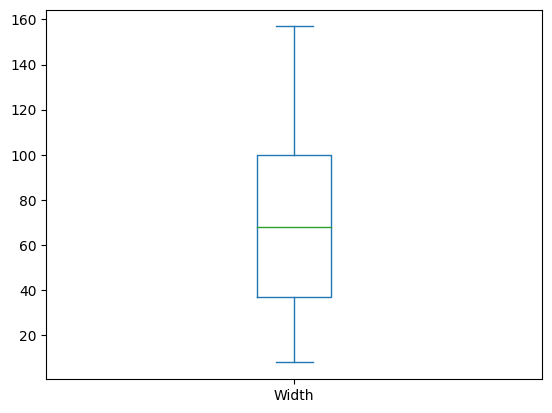

In [55]:
data.Width.plot(kind='box')                 #we treat   outliers

<Axes: >

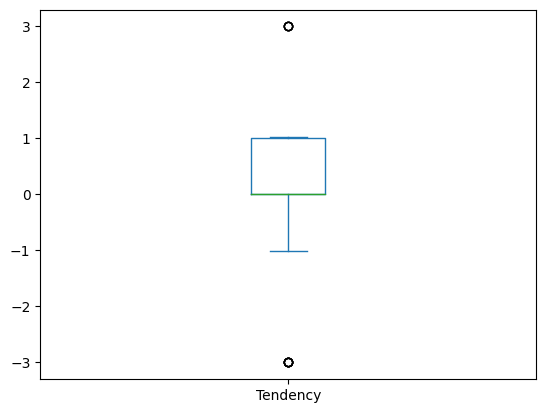

In [56]:
data.Tendency.plot(kind='box')                   #we detect outliers

In [57]:
data.loc[data['Tendency']>data['Tendency'].quantile(0.99),'Tendency']=data['Tendency'].quantile(0.99)
data.loc[data['Tendency']<data['Tendency'].quantile(0.01),'Tendency']=data['Tendency'].quantile(0.01)

<Axes: >

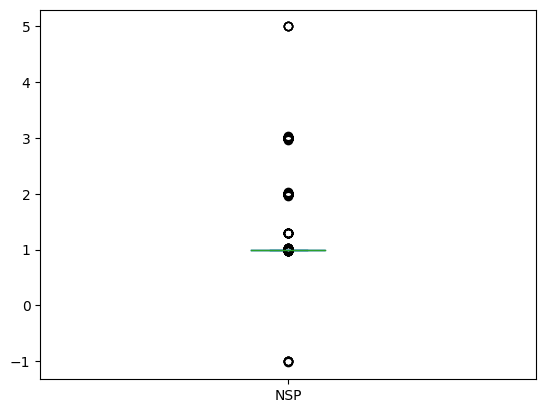

In [58]:
data.NSP.plot(kind='box')                    #we treat outliers

# 2.	Statistical Summary:

●	Provide a statistical summary for each variable in the dataset, including measures of central tendency (mean, median) and dispersion (standard deviation, interquartile range).

In [59]:
data.describe() # describe given the statistical  summer of data
                      # q1=25thpercentiles,q3=75th percentiles

index           LB           AC           FM           UC  \
count  2124.000000  2124.000000  2124.000000  2124.000000  2124.000000   
mean   1062.289077   133.300793     0.003180     0.009557     0.004364   
std     614.095660     9.831477     0.003842     0.044262     0.002949   
min       0.000000   110.000000    -0.000049    -0.001202     0.000000   
25%     530.750000   126.000000     0.000000     0.000000     0.001858   
50%    1061.500000   133.000000     0.001668     0.000000     0.004486   
75%    1594.250000   140.000000     0.005612     0.002568     0.006536   
max    2125.000000   158.000000     0.015154     0.358697     0.011577   

                DL            DS           DP         ASTV         MSTV  \
count  2124.000000  2.124000e+03  2124.000000  2124.000000  2124.000000   
mean      0.001897  5.823635e-08     0.000159    47.001724     1.339109   
std       0.003344  6.137725e-07     0.000563    17.239838     0.880314   
min      -0.015393 -2.505929e-06    -0.000018    15.230000     0.200000   
25%       0.000000  0.000000e+00     0.000000    32.000000     0.700000   
50%       0.000000  0.000000e+00     0.000000    49.000000     1.200000   
75%       0.003292  0.000000e+00     0.000000    61.000000     1.700000   
max       0.030769  3.650072e-06     0.003183    81.770000     4.900000   

              ALTV         MLTV        Width     Tendency          NSP  
count  2124.000000  2124.000000  2124.000000  2124.000000  2124.000000  
mean     10.076930     8.182835    70.344211     0.318510     1.304797  
std      18.766797     5.479232    38.741459     0.611559     0.641660  
min      -0.273170     0.000000     8.000000    -1.000000    -1.025988  
25%       0.000000     4.600000    37.000000     0.000000     1.000000  
50%       0.000000     7.500000    68.000000     0.000000     1.000000  
75%      11.000000    10.800000   100.000000     1.000000     1.000000  
max      83.540000    27.554000   156.850000     1.000000     5.000000

# New Section

In [60]:
list = data.columns

In [61]:
def statisticofdata(columes):
  a =columes.mean()
  print("mean =",a )
  b =columes.median()
  print("median =", b)
  c =columes.std()
  print("std= ",c)


In [62]:
statisticofdata(data.LB) #lb columes

mean = 133.30079267867782
median = 133.0
std=  9.831477298947942


In [63]:
statisticofdata(data.AC)   #ac columes

mean = 0.003179549143494106
median = 0.001668057
std=  0.003842222843838278


In [64]:
statisticofdata(data.FM)     #fm columes

mean = 0.009557434864139354
median = 0.0
std=  0.04426161520789784


In [65]:
statisticofdata(data.UC)      #uc columes

mean = 0.004364053400464046
median = 0.0044863175
std=  0.0029486509458974217


In [66]:
statisticofdata(data.DL)      #DL columes

mean = 0.0018971294572578793
median = 0.0
std=  0.0033437499350879446


In [67]:
statisticofdata(data.DS)      #DS columes

mean = 5.823635159034282e-08
median = 0.0
std=  6.137724589976704e-07


In [68]:
statisticofdata(data.ASTV)      #ASTV columes

mean = 47.00172432573231
median = 49.0
std=  17.23983787276077


In [69]:
statisticofdata(data.MSTV)      #MSTV col

mean = 1.33910940454091
median = 1.2
std=  0.8803138515469174


In [70]:
statisticofdata(data.ALTV)      #ALTV columes

mean = 10.076929798873605
median = 0.0
std=  18.766797432112245


In [71]:
statisticofdata(data.MLTV)      #MLTV columes

mean = 8.182834878022431
median = 7.5
std=  5.47923216842601


In [72]:
statisticofdata(data.Width)      #Width columes

mean = 70.34421132898862
median = 68.0
std=  38.7414588654948


In [73]:
statisticofdata(data.Tendency)      #Tendency columes

mean = 0.31850959371365517
median = 0.0
std=  0.6115587548675663


# 3.	Data Visualization:

●	Create histograms or boxplots to visualize the distributions of various numerical variables.

(array([ 59.,  60., 292., 325., 398., 361., 277., 235.,  75.,  42.]),
 array([110. , 114.8, 119.6, 124.4, 129.2, 134. , 138.8, 143.6, 148.4,
        153.2, 158. ]),
 <BarContainer object of 10 artists>)

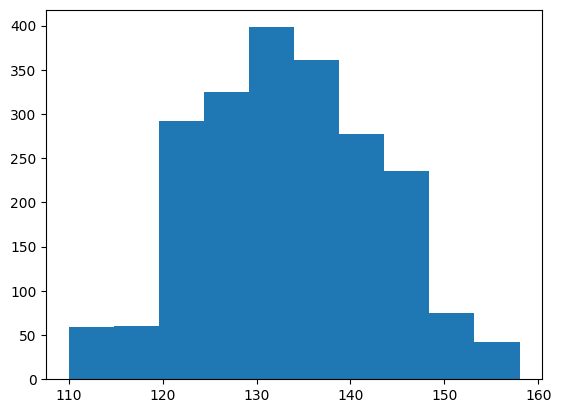

In [74]:
plt.hist(data['LB'])   #it is normal distributions

In [75]:
data.columns

Index(['index', 'LB', 'AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'ASTV', 'MSTV',
       'ALTV', 'MLTV', 'Width', 'Tendency', 'NSP'],
      dtype='object')

<Axes: ylabel='Frequency'>

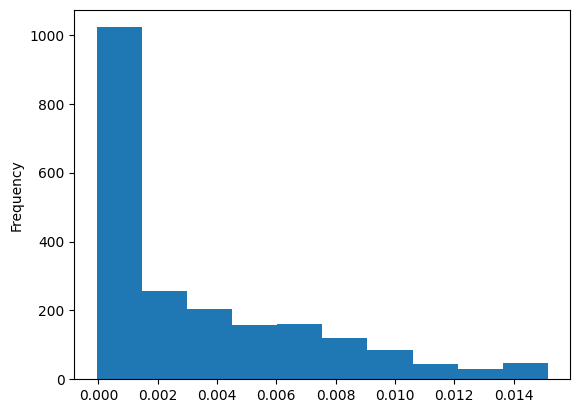

In [76]:
data.AC.plot(kind='hist')          #positive skewness

<Axes: ylabel='Frequency'>

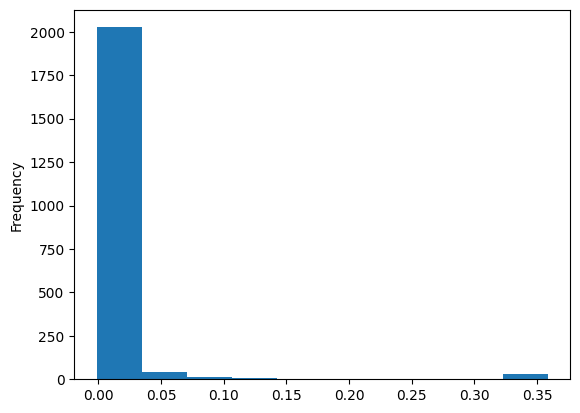

In [77]:
data.FM.plot(kind='hist')            #positive  skewness

<Axes: ylabel='Frequency'>

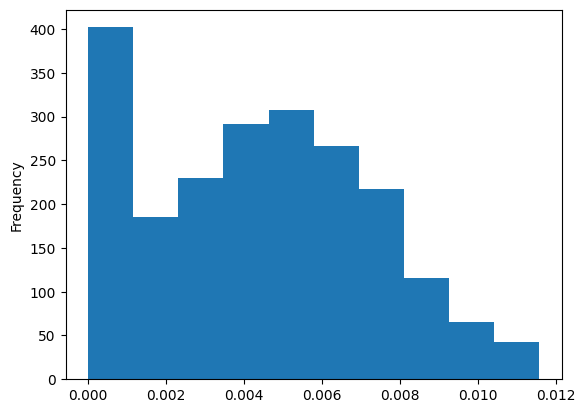

In [78]:
data.UC.plot(kind='hist')               #positive skewness skewness and normaldistribuyion

<Axes: ylabel='Frequency'>

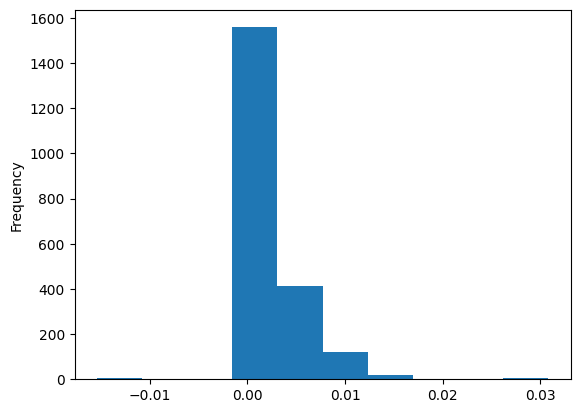

In [79]:
data.DL.plot(kind='hist')           # it is normal distribution

<Axes: ylabel='Frequency'>

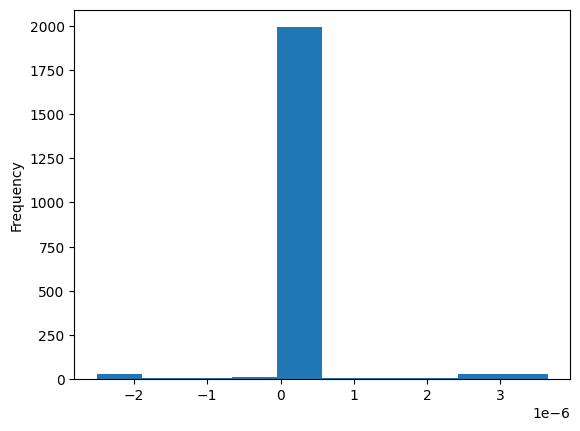

In [80]:
data.DS.plot(kind='hist')           #normal distribution

<Axes: ylabel='Frequency'>

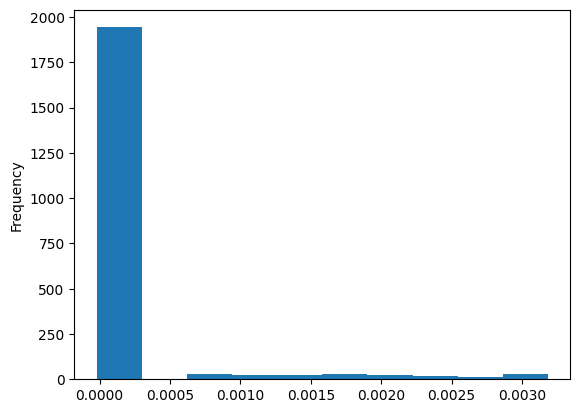

In [81]:
data.DP.plot(kind='hist')              #positive skewness skewness

<Axes: ylabel='Frequency'>

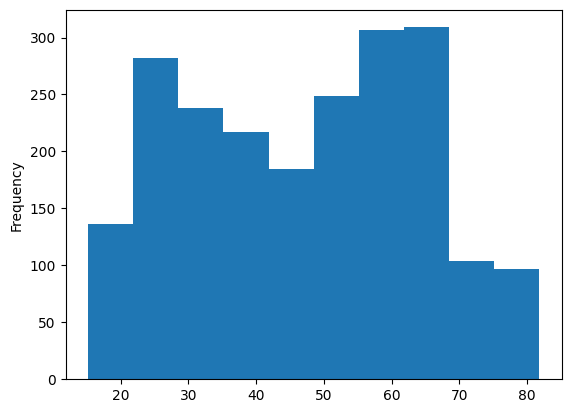

In [82]:
data.ASTV.plot(kind='hist')            #uniform distribution

<Axes: ylabel='Frequency'>

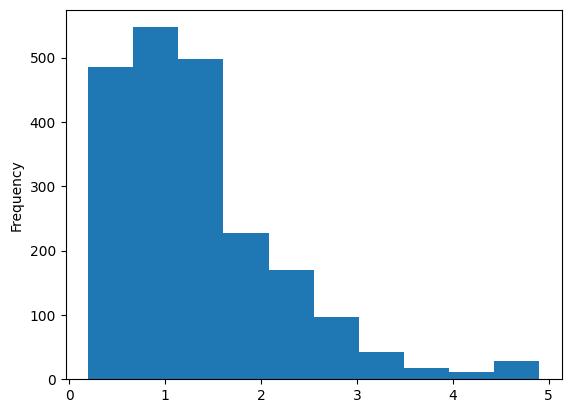

In [83]:
data.MSTV.plot(kind='hist')             #postive skewness and  normal distribution

<Axes: ylabel='Frequency'>

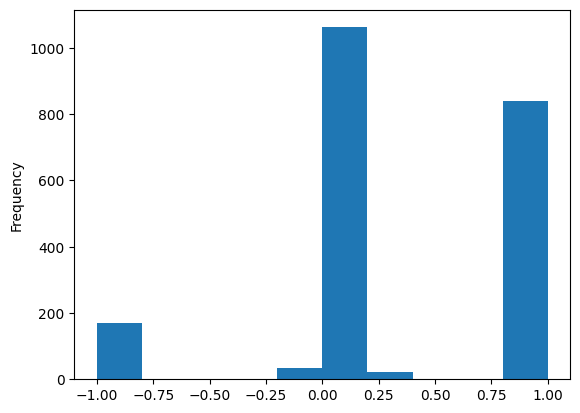

In [84]:
data.Tendency.plot(kind='hist')         #

In [85]:
data.head()

index          LB        AC   FM        UC        DL   DS   DP  ASTV  MSTV  \
0      0  120.000000  0.000000  0.0  0.000000  0.000000  0.0  0.0  73.0   0.5   
1      1  132.000000  0.006380  0.0  0.006380  0.003190  0.0  0.0  17.0   2.1   
2      2  133.000000  0.003322  0.0  0.008306  0.003322  0.0  0.0  16.0   2.1   
3      3  134.000000  0.002561  0.0  0.007742  0.002561  0.0  0.0  16.0   2.4   
4      4  131.948232  0.006515  0.0  0.008143  0.000000  0.0  0.0  16.0   2.4   

   ALTV  MLTV  Width  Tendency  NSP  
0  43.0   2.4   64.0  0.999926  2.0  
1   0.0  10.4  130.0  0.000000  1.0  
2   0.0  13.4  130.0  0.000000  1.0  
3   0.0  23.0  117.0  1.000000  1.0  
4   0.0  19.9  117.0  1.000000  1.0

In [86]:
data = data.drop(['index'],axis=1)

In [87]:
data.head()

LB        AC   FM        UC        DL   DS   DP  ASTV  MSTV  ALTV  \
0  120.000000  0.000000  0.0  0.000000  0.000000  0.0  0.0  73.0   0.5  43.0   
1  132.000000  0.006380  0.0  0.006380  0.003190  0.0  0.0  17.0   2.1   0.0   
2  133.000000  0.003322  0.0  0.008306  0.003322  0.0  0.0  16.0   2.1   0.0   
3  134.000000  0.002561  0.0  0.007742  0.002561  0.0  0.0  16.0   2.4   0.0   
4  131.948232  0.006515  0.0  0.008143  0.000000  0.0  0.0  16.0   2.4   0.0   

   MLTV  Width  Tendency  NSP  
0   2.4   64.0  0.999926  2.0  
1  10.4  130.0  0.000000  1.0  
2  13.4  130.0  0.000000  1.0  
3  23.0  117.0  1.000000  1.0  
4  19.9  117.0  1.000000  1.0

In [88]:
#●	Use bar charts or pie charts to display the frequency of categories for categorical variables.

<Axes: xlabel='Tendency'>

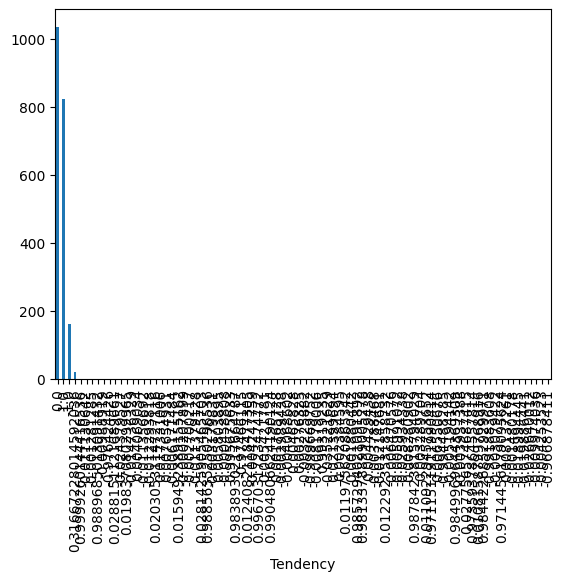

In [89]:
data.Tendency.value_counts().plot(kind='bar')

<Axes: ylabel='count'>

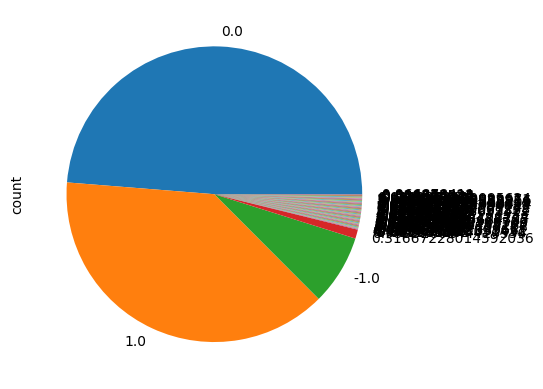

In [90]:
data.Tendency.value_counts().plot(kind='pie')

<Axes: xlabel='NSP'>

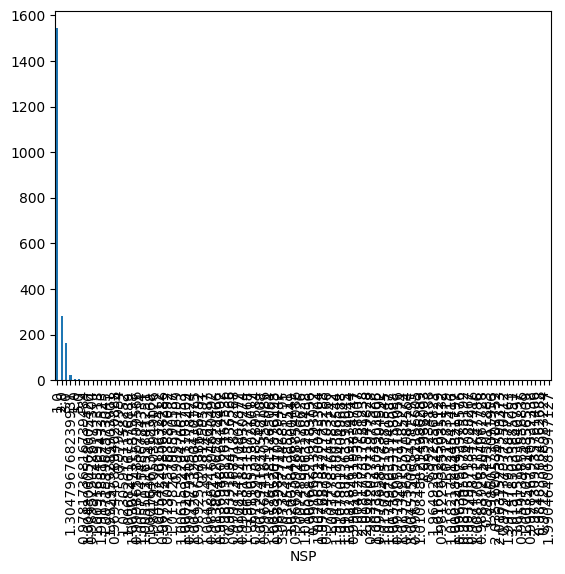

In [91]:
data.NSP.value_counts().plot(kind='bar')

<Axes: ylabel='count'>

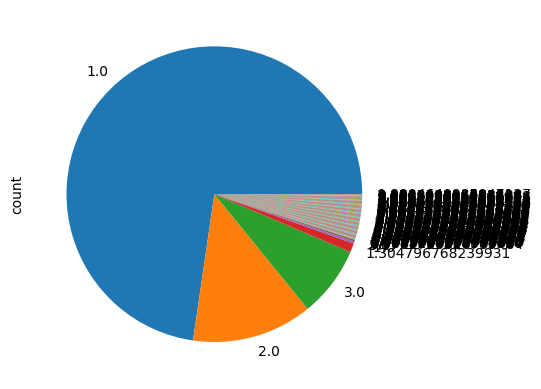

In [92]:
data.NSP.value_counts().plot(kind='pie')

In [93]:
#●	Generate scatter plots or correlation heatmaps to explore relationships between pairs of variables.

<Axes: >

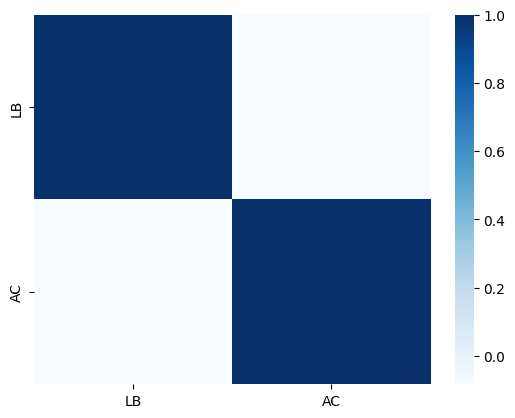

In [94]:
correlation = data[['LB','AC']].corr()
sns.heatmap(correlation,cmap='Blues')

<Axes: >

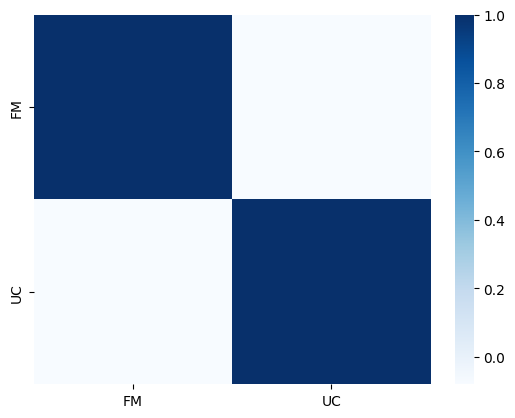

In [95]:
corr = data[['FM','UC']].corr()
sns.heatmap(corr,cmap='Blues')

<Axes: >

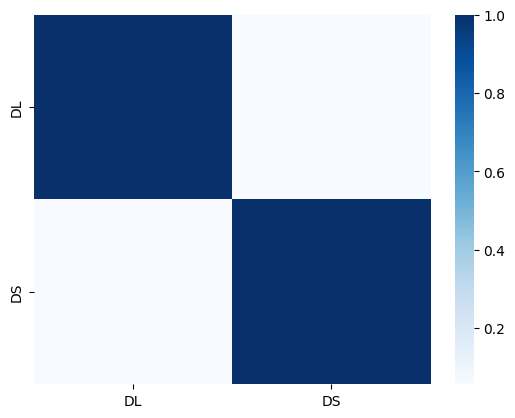

In [96]:
corr = data[['DL','DS']].corr()
sns.heatmap(corr,cmap='Blues')

<Axes: >

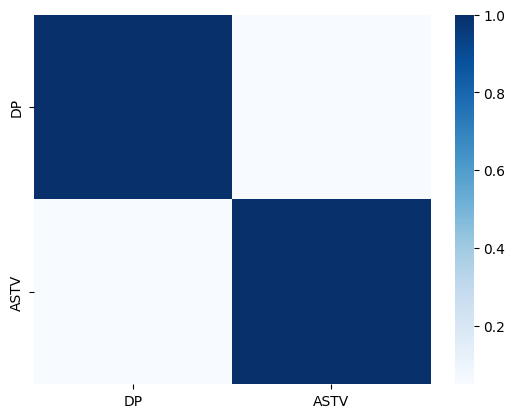

In [97]:
corr = data[['DP','ASTV']].corr()
sns.heatmap(corr,cmap='Blues')

<Axes: >

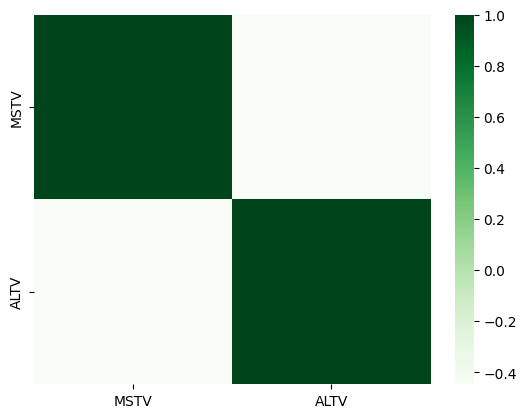

In [98]:
corr = data[['MSTV','ALTV']].corr()
sns.heatmap(corr,cmap='Greens')

<Axes: >

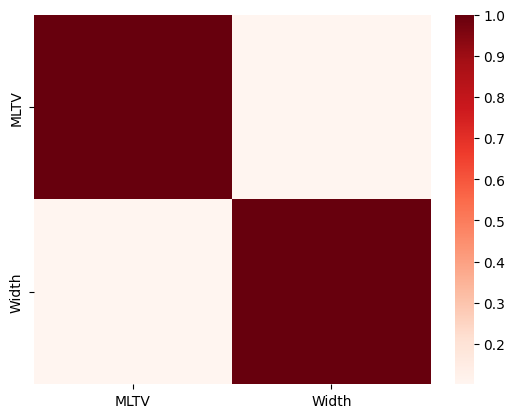

In [99]:
corr = data[['MLTV','Width']].corr()
sns.heatmap(corr,cmap='Reds')

<Axes: >

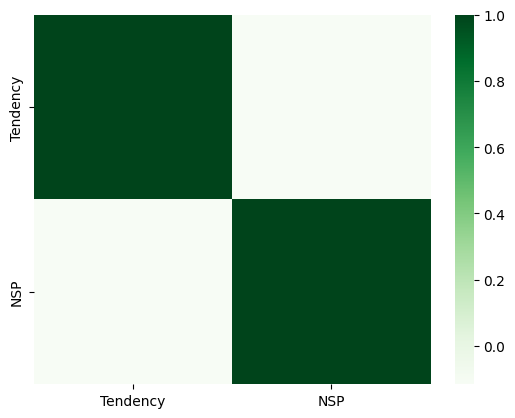

In [100]:
corr = data[['Tendency','NSP']].corr()
sns.heatmap(corr,cmap='Greens')

●	Employ advanced visualization techniques like pair plots, or violin plots for deeper insights

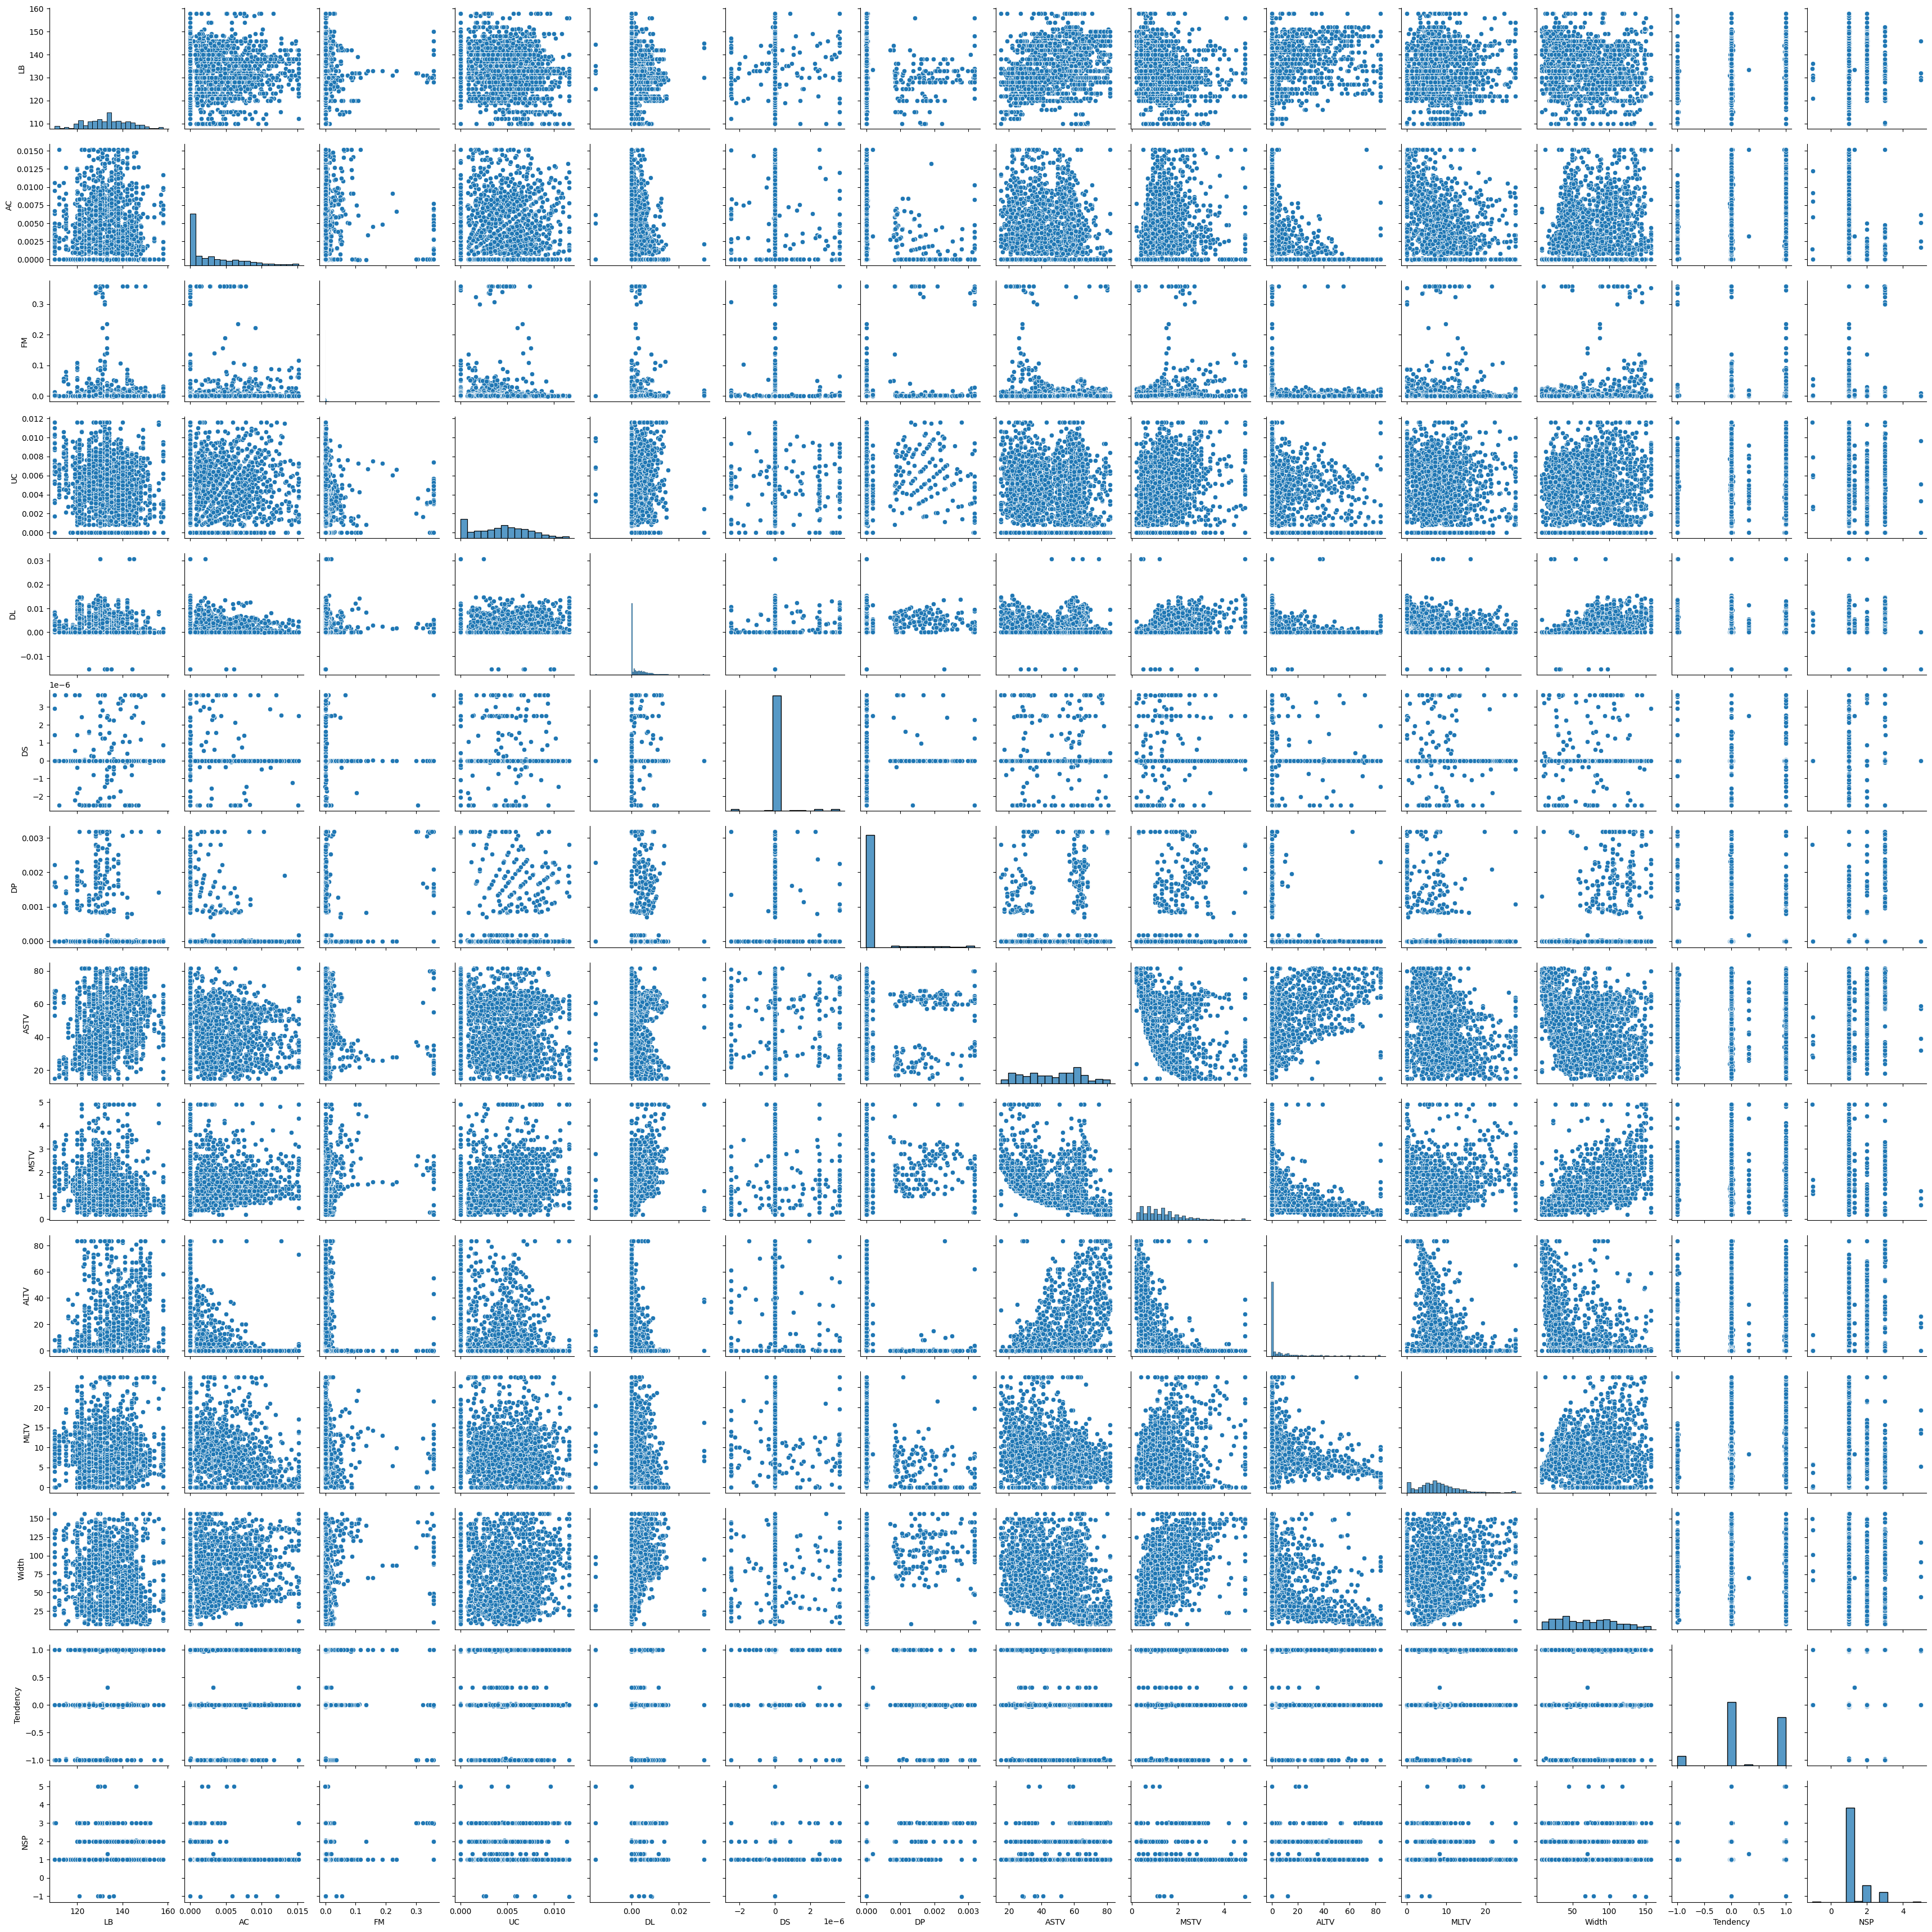

In [101]:
sns.pairplot(data)      #most no columes relation between them
plt.show()

<Axes: >

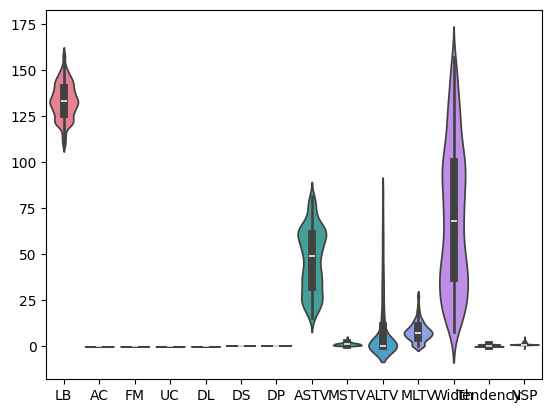

In [102]:
sns.violinplot(data)

# 4.	Pattern Recognition and Insights:

In [103]:
#	Identify any correlations between variables and discuss their potential implications.

In [107]:
data.corr()
# Width and MSTV: The correlation coefficient is 0.632693, indicating a strong positive correlation.
#DL and MSTV: The correlation coefficient is 0.493047, indicating a moderate positive correlation.
#ASTV and ALTV: The correlation coefficient is 0.436431, indicating a moderate positive correlation.

LB        AC        FM        UC        DL        DS  \
LB        1.000000 -0.083521 -0.015488 -0.159625 -0.134925  0.004135   
AC       -0.083521  1.000000  0.030065  0.090641 -0.105682 -0.010314   
FM       -0.015488  0.030065  1.000000 -0.080975  0.034933 -0.005345   
UC       -0.159625  0.090641 -0.080975  1.000000  0.214715  0.030262   
DL       -0.134925 -0.105682  0.034933  0.214715  1.000000  0.056738   
DS        0.004135 -0.010314 -0.005345  0.030262  0.056738  1.000000   
DP       -0.097584 -0.129685  0.245013  0.104277  0.206778  0.037043   
ASTV      0.295089 -0.274247 -0.074629 -0.224595 -0.080958  0.019701   
MSTV     -0.267996  0.201442  0.091321  0.276759  0.493047  0.041820   
ALTV      0.275226 -0.355021 -0.054279 -0.292396 -0.219221 -0.041477   
MLTV     -0.029713 -0.143695  0.006495 -0.065099 -0.213106 -0.009282   
Width    -0.140609  0.290373  0.157727  0.133165  0.448452  0.028572   
Tendency  0.286570  0.030307 -0.013700 -0.076747 -0.023013 -0.024133   
NSP       0.147894 -0.345811  0.099461 -0.206615  0.025095  0.071133   

                DP      ASTV      MSTV      ALTV      MLTV     Width  \
LB       -0.097584  0.295089 -0.267996  0.275226 -0.029713 -0.140609   
AC       -0.129685 -0.274247  0.201442 -0.355021 -0.143695  0.290373   
FM        0.245013 -0.074629  0.091321 -0.054279  0.006495  0.157727   
UC        0.104277 -0.224595  0.276759 -0.292396 -0.065099  0.133165   
DL        0.206778 -0.080958  0.493047 -0.219221 -0.213106  0.448452   
DS        0.037043  0.019701  0.041820 -0.041477 -0.009282  0.028572   
DP        1.000000  0.049064  0.249906 -0.126884 -0.221964  0.267828   
ASTV      0.049064  1.000000 -0.415184  0.436431 -0.314763 -0.253511   
MSTV      0.249906 -0.415184  1.000000 -0.447220  0.053413  0.632693   
ALTV     -0.126884  0.436431 -0.447220  1.000000 -0.171021 -0.433368   
MLTV     -0.221964 -0.314763  0.053413 -0.171021  1.000000  0.102121   
Width     0.267828 -0.253511  0.632693 -0.433368  0.102121  1.000000   
Tendency -0.199042 -0.008375 -0.064496  0.042856  0.150621  0.115144   
NSP       0.426612  0.453151 -0.122650  0.406154 -0.187794 -0.074833   

          Tendency       NSP  
LB        0.286570  0.147894  
AC        0.030307 -0.345811  
FM       -0.013700  0.099461  
UC       -0.076747 -0.206615  
DL       -0.023013  0.025095  
DS       -0.024133  0.071133  
DP       -0.199042  0.426612  
ASTV     -0.008375  0.453151  
MSTV     -0.064496 -0.122650  
ALTV      0.042856  0.406154  
MLTV      0.150621 -0.187794  
Width     0.115144 -0.074833  
Tendency  1.000000 -0.115710  
NSP      -0.115710  1.000000

# ●	Look for trends or patterns over time if temporal data is available.

temporal date :any time series is called temporal data
we not have temporal data in our data set

# 5.	Conclusion:

●	Summarize the key insights and patterns discovered through your exploratory analysis.

we find key insights like that mean and median ,mode and we fill if we find nullvalue
we draw box plot for find outliner and we trat it
we draw histgram to find data patten
we plot scater plot to know relation with feacher

In [109]:
#●	Discuss how these findings could impact decision-making or further analyses

it finding help as to find the relation between feacher and it help to implument in ml